In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(10886, 12)

In [4]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##### Data Fields

<ul>
    <li> datetime - hourly date + timestamp  </li>
    <li> Season
        <ul>
        <li> 1: Spring (March, April, May) </li>
        <li> 2: Summer (June, July, August)</li>
        <li> 3: Fall (September, October, November)</li>
        <li> 4: Winter (December, January, February)</li>
        </ul>
    </li>
    <li> Holiday : Whether the day is considered a holiday</li>
    <li> Workingday - whether the day is neither a weekend nor holiday</li>
    <li> Weather
        <ul>
        <li> 1: Clear, Few clouds, Partly cloudy, Partly cloudy  </li>
        <li> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  </li>
        <li> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds </li>
        <li> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </li>
        </ul>
    </li>
    <li> Temp - Temperature in Celsius</li>
    <li> atemp - "feels like" temperature in Celsius</li>
    <li>windspeed: Windspeed</li>
    <li> Humidity - The humidity</li>
    <li> casual - number of non-registered user rentals initiated</li>
    <li> registered - number of registered user rentals initiated</li>
    <li> count - number of total rentals</li>
</ul>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
df['datetime']=pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [8]:
df.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [9]:
df['day_of_week']=df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.week
df['hour'] = df['datetime'].dt.hour
df['year'] = df['datetime'].dt.year
df['day_of_month']=df['datetime'].dt.day

In [10]:
df.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week,month,week,hour,year,day_of_month
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,12,51,19,2012,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,12,51,20,2012,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,12,51,21,2012,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2,12,51,22,2012,19
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2,12,51,23,2012,19


In [11]:
df.drop('datetime',axis=1,inplace=True)

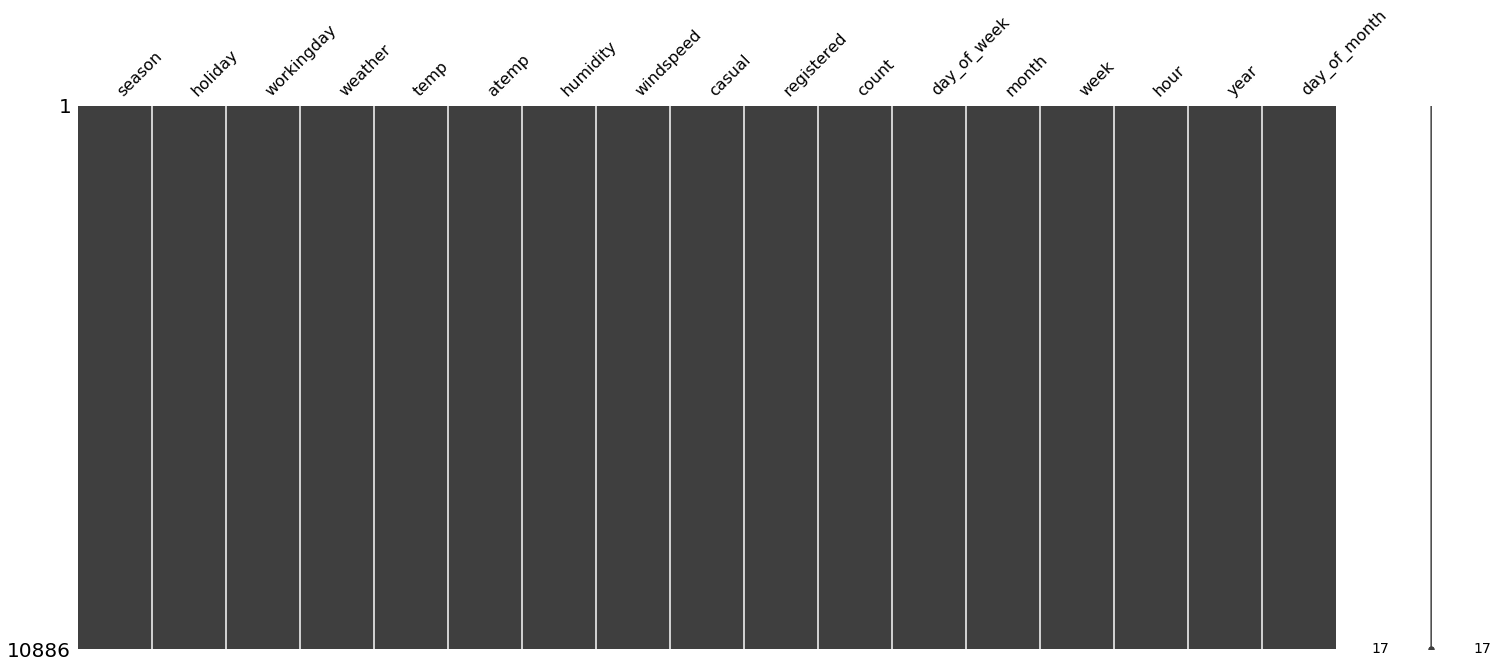

In [12]:
msno.matrix(df)

In [13]:
df.isnull().sum()

season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
day_of_week     0
month           0
week            0
hour            0
year            0
day_of_month    0
dtype: int64

<font color=red>

# Let's Do Some EDA
</font>


In [14]:
grp_by_season=df.groupby('season').agg({'windspeed': ['min', 'max','mean'], 'count': 'sum','temp': ['min', 'max','mean'],'atemp': ['min', 'max','mean'],'humidity': ['min', 'max','mean']})
grp_by_season.columns=["_".join(x) for x in grp_by_season.columns.ravel()]
grp_by_season.reset_index(inplace=True)

grp_by_weath_hr=df.groupby(['weather','hour']).agg({'windspeed': ['min', 'max','mean'], 'count': 'sum','temp': ['min', 'max','mean'],'atemp': ['min', 'max','mean'],'humidity': ['min', 'max','mean']})
grp_by_weath_hr.columns=["_".join(x) for x in grp_by_weath_hr.columns.ravel()]
grp_by_weath_hr.reset_index(inplace=True)


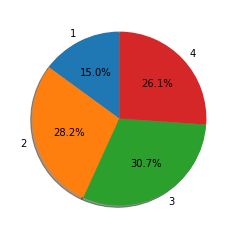

In [15]:
plt.pie(grp_by_season.count_sum,labels=grp_by_season.season, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

#Most People Prefer In The Fall and Spring the Least

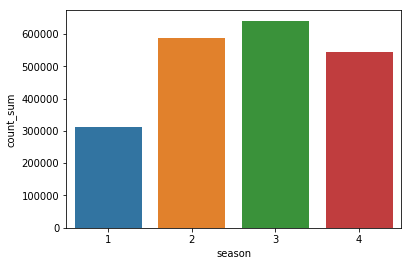

In [16]:
sns.barplot(x='season',y='count_sum',data=grp_by_season)
plt.show()

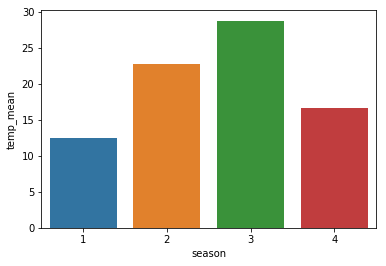

In [17]:
sns.barplot(x='season',y='temp_mean',data=grp_by_season)

#Surprisingly the Mean Temperature is also the most in Fall

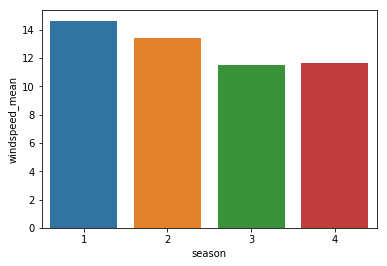

In [18]:
sns.barplot(x='season',y='windspeed_mean',data=grp_by_season)

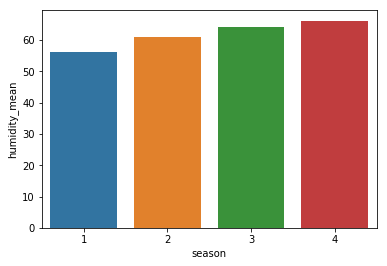

In [19]:
sns.barplot(x='season',y='humidity_mean',data=grp_by_season)

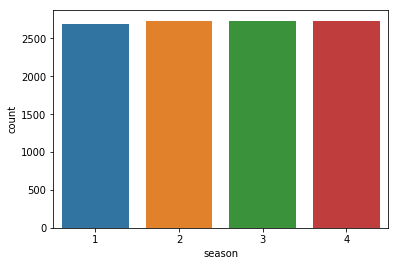

In [20]:
sns.countplot(x='season',data=df)

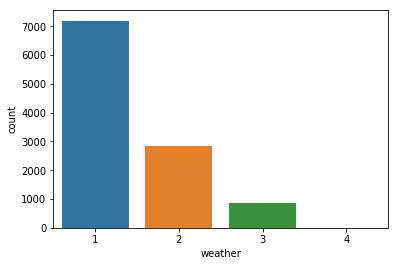

In [21]:
sns.countplot(x='weather',data=df)

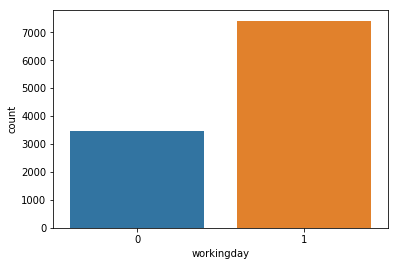

In [22]:
sns.countplot(x='workingday',data=df)

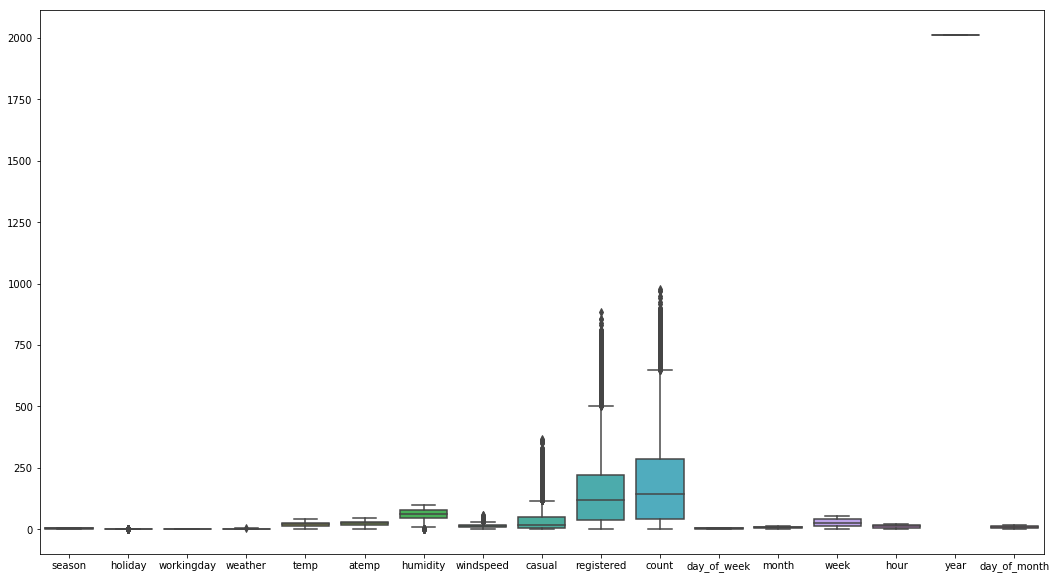

In [23]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df)

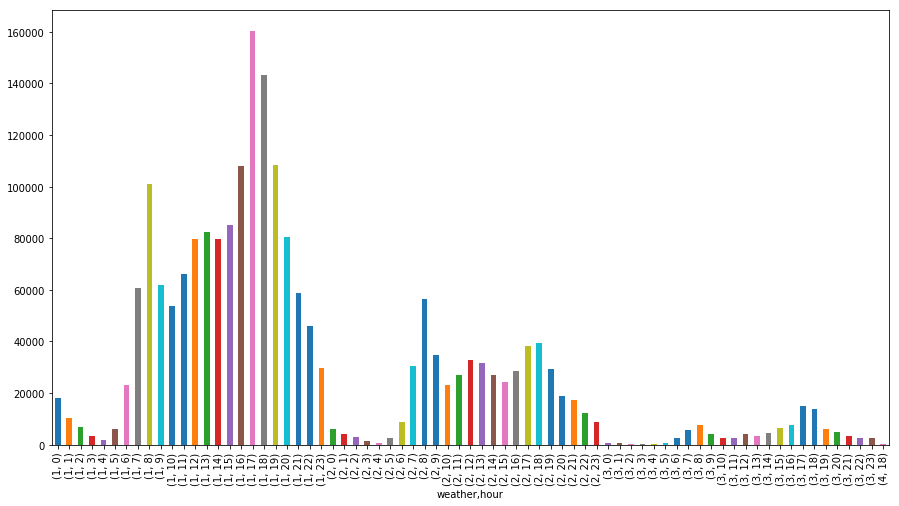

In [24]:
plt.figure(figsize=(15,8))
#df.groupby(['weathersit','hr']).sum()['cnt'].unstack().plot(kind = 'bar')
df.groupby(['weather','hour']).sum()['count'].plot(kind = 'bar')
plt.show()

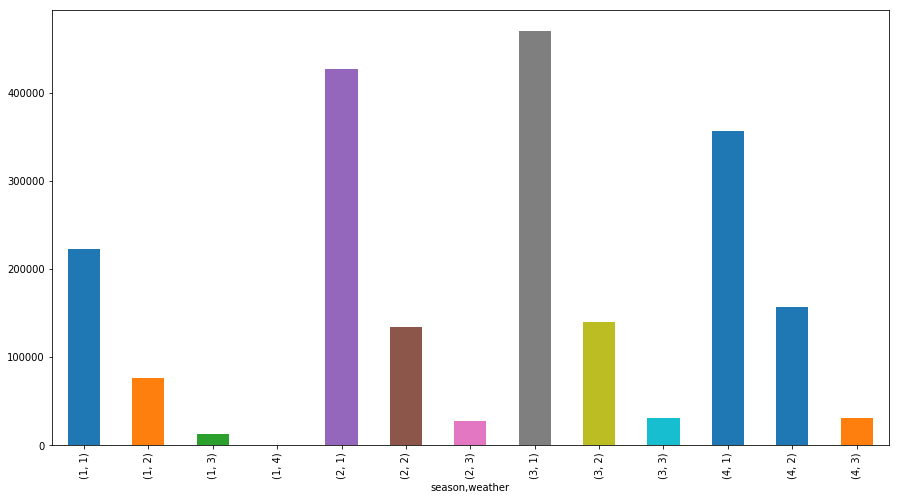

In [25]:
plt.figure(figsize=(15,8))
df.groupby(['season','weather']).sum()['count'].plot(kind = 'bar')
plt.show()

In [26]:
grp_by_season.head(2)

,season,windspeed_min,windspeed_max,windspeed_mean,count_sum,temp_min,temp_max,temp_mean,atemp_min,atemp_max,atemp_mean,humidity_min,humidity_max,humidity_mean
0,1,0.0,51.9987,14.636978,312498,0.82,29.52,12.530491,0.760,32.575,15.228956,0,100,56.297841
1,2,0.0,47.9988,13.405607,588282,9.84,38.54,22.823483,11.365,43.940,26.647098,16,100,60.852909


In [27]:
grp_by_weath_hr.head(2)

,weather,hour,windspeed_min,windspeed_max,windspeed_mean,count_sum,temp_min,temp_max,temp_mean,atemp_min,atemp_max,atemp_mean,humidity_min,humidity_max,humidity_mean
0,1,0,0.0,32.9975,10.579498,18214,3.28,33.62,19.102763,3.030,39.395,22.580296,12,100,63.967105
1,1,1,0.0,51.9987,10.236853,10397,1.64,33.62,18.657770,1.515,39.395,22.072061,14,94,65.912162


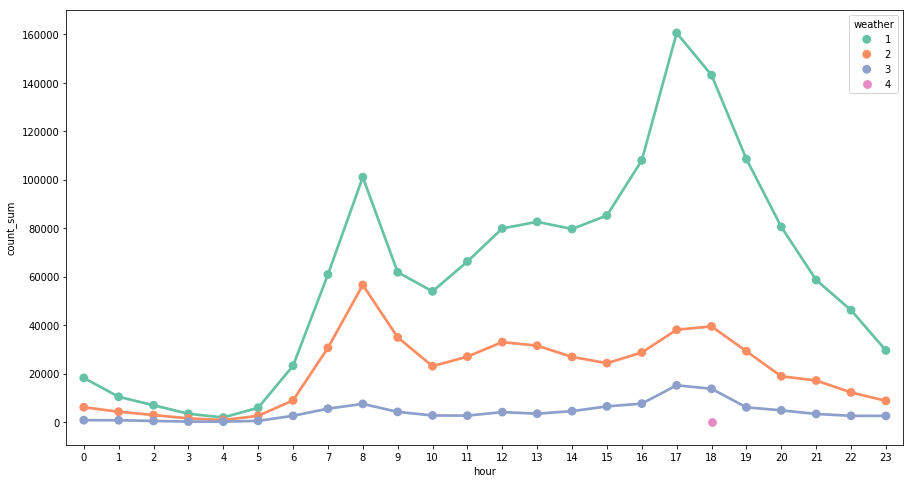

In [28]:
plt.figure(figsize=(15,8))
sns.pointplot(x='hour',y='count_sum',data=grp_by_weath_hr,hue='weather',style='weather',palette='Set2',errwidth=0)


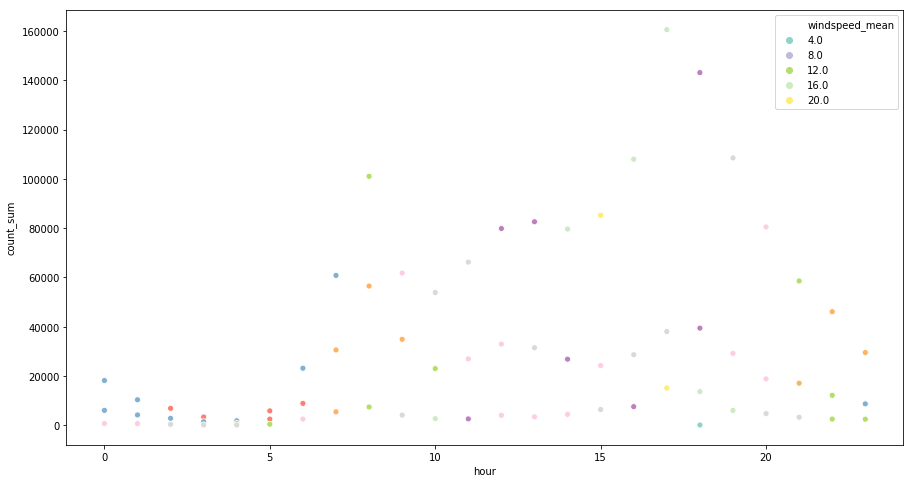

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='hour',y='count_sum',data=grp_by_weath_hr,hue='windspeed_mean',palette='Set3')


C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


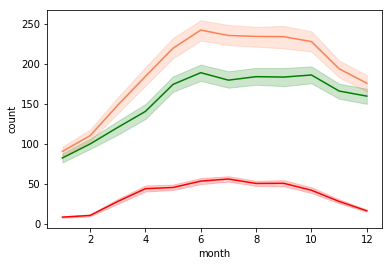

In [30]:
sns.lineplot(x="month", y="registered", data=df,color='green')
sns.lineplot(x="month",y="casual",data=df,color='red')
sns.lineplot(x="month",y="count",data=df,color='coral')
plt.show()

From 4th to 6th month, we can see a hike in registrations

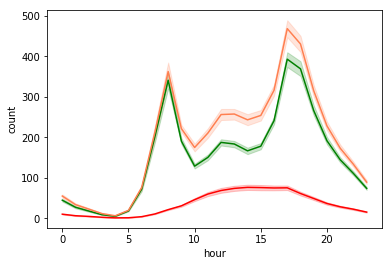

In [31]:
sns.lineplot(x="hour", y="registered", data=df,color='green')
sns.lineplot(x="hour",y="casual",data=df,color='red')
sns.lineplot(x="hour",y="count",data=df,color='coral')
plt.show()

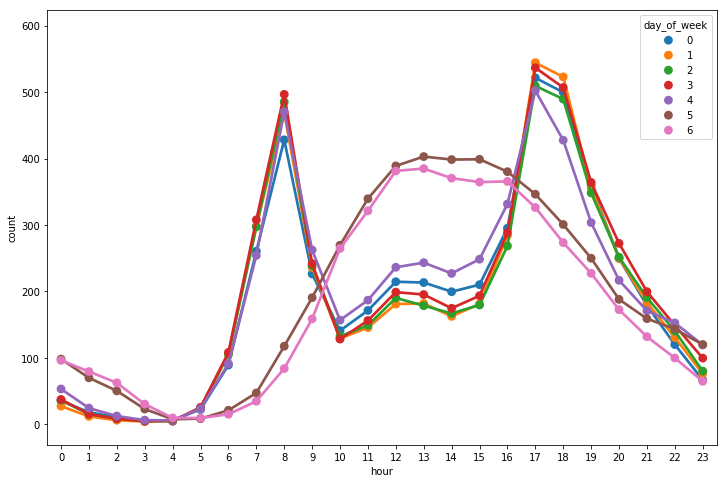

In [32]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hour',y='count',hue='day_of_week',data=df,errwidth=0)

In [33]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'day_of_week',
       'month', 'week', 'hour', 'year', 'day_of_month'],
      dtype='object')

In [34]:
correltion=df[['season', 'holiday', 'workingday', 'weather', 
        'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count','hour','day_of_week']].corr()

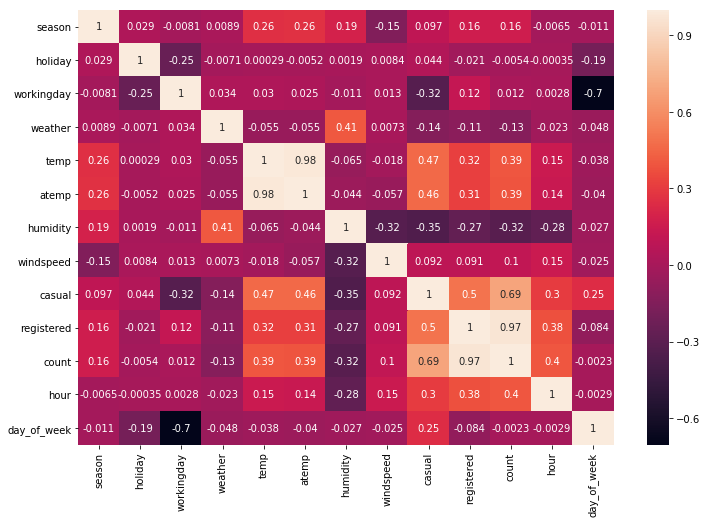

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(correltion,annot=True)

In [36]:
df2=df[['season', 'holiday', 'workingday', 'weather', 
        'temp', 'humidity', 'windspeed', 'count','hour','day_of_week']]

In [37]:
for column in ['season', 'holiday', 'workingday', 'weather','hour','day_of_week']:
    df2[column]=df2[column].astype("category")

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
season         10886 non-null category
holiday        10886 non-null category
workingday     10886 non-null category
weather        10886 non-null category
temp           10886 non-null float64
humidity       10886 non-null int64
windspeed      10886 non-null float64
count          10886 non-null int64
hour           10886 non-null category
day_of_week    10886 non-null category
dtypes: category(6), float64(2), int64(2)
memory usage: 405.8 KB


In [39]:
df2['sesweath']=df2['season'].astype(int)*df2['weather'].astype(int)
df2['weathr']=df2['weather'].astype(int)*df2['hour'].astype(int)


C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'hour', 'day_of_week', 'sesweath', 'weathr'],
      dtype='object')

In [41]:
X=df2.drop('count',axis=1)
y=df2['count']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [43]:
from sklearn.linear_model import LinearRegression
linearreg=LinearRegression()

In [44]:
linearreg.fit(X_train,y_train)
predictions=linearreg.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.32225468327208406

In [46]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
print("The accuracy of Decision Tree Regressor is: ", clf.score(X_test, y_test) )

The accuracy of Decision Tree Regressor is:  0.7172132877031736


In [47]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators= 200)
clf.fit(X_train, y_train)
print('The accuracy of Random Forest Regressor is: ', clf.score(X_test, y_test))

The accuracy of Random Forest Regressor is:  0.8610789419265439
